# Breast Cancer classification using Deep Learning

In [1]:
import numpy as np
import pandas as pd
import sklearn.datasets
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
df = sklearn.datasets.load_breast_cancer()

In [3]:
print(df)

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]]), 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
 

In [4]:
cancer_data = pd.DataFrame(df.data, columns=df.feature_names)

In [5]:
cancer_data['label'] = df.target

In [6]:
cancer_data.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [7]:
cancer_data.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
label                      0
dtype: int64

In [8]:
cancer_data.shape

(569, 31)

In [9]:
cancer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [10]:
cancer_data['label'].value_counts()

1    357
0    212
Name: label, dtype: int64

1 --> Benign  
0 --> Malignant

In [11]:
cancer_data.groupby('label').mean()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
label,,,,,,,,,,,,,,,,,,,,,
0,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,0.062680,...,21.134811,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530
1,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,0.062867,...,13.379801,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442


In [12]:
# Separating into features and target

x = cancer_data.drop(columns='label')
y = cancer_data.label

In [13]:
print(x, y)

     mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     mean compactness  mean concavity  mean concave points  mea

In [14]:
# Splitting the data into train and test data

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

In [15]:
# Standardizing the data

from sklearn.preprocessing import StandardScaler

In [16]:
scaler = StandardScaler()

x_train_std = scaler.fit_transform(x_train)

x_test_std = scaler.fit_transform(x_test)

In [17]:
print(x_train_std)

[[-0.01330339  1.7757658  -0.01491962 ... -0.13236958 -1.08014517
  -0.03527943]
 [-0.8448276  -0.6284278  -0.87702746 ... -1.11552632 -0.85773964
  -0.72098905]
 [ 1.44755936  0.71180168  1.47428816 ...  0.87583964  0.4967602
   0.46321706]
 ...
 [-0.46608541 -1.49375484 -0.53234924 ... -1.32388956 -1.02997851
  -0.75145272]
 [-0.50025764 -1.62161319 -0.527814   ... -0.0987626   0.35796577
  -0.43906159]
 [ 0.96060511  1.21181916  1.00427242 ...  0.8956983  -1.23064515
   0.50697397]]


In [18]:
print(x.shape, x_train.shape, x_test.shape)

(569, 30) (455, 30) (114, 30)


# Building the Neural Network

In [19]:
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras

In [20]:
# Setting up the layers of Neural Networks

model = keras.Sequential([
            keras.layers.Flatten(input_shape=(30,)),
            keras.layers.Dense(20, activation='relu'),
            keras.layers.Dense(2, activation='sigmoid')
])

In [21]:
# Compiling the Neural network

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [22]:
# Training the Neural Network

history = model.fit(x_train_std, y_train, validation_split=0.1, epochs=10) 

Epoch 1/10
13/13 [==============================] - 1s 31ms/step - loss: 0.6325 - accuracy: 0.6357 - val_loss: 0.4605 - val_accuracy: 0.8261
Epoch 2/10
13/13 [==============================] - 0s 7ms/step - loss: 0.4051 - accuracy: 0.8435 - val_loss: 0.2861 - val_accuracy: 0.9130
Epoch 3/10
13/13 [==============================] - 0s 7ms/step - loss: 0.2835 - accuracy: 0.9169 - val_loss: 0.2077 - val_accuracy: 0.9130
Epoch 4/10
13/13 [==============================] - 0s 7ms/step - loss: 0.2221 - accuracy: 0.9413 - val_loss: 0.1691 - val_accuracy: 0.9130
Epoch 5/10
13/13 [==============================] - 0s 8ms/step - loss: 0.1841 - accuracy: 0.9535 - val_loss: 0.1473 - val_accuracy: 0.9348
Epoch 6/10
13/13 [==============================] - 0s 8ms/step - loss: 0.1608 - accuracy: 0.9584 - val_loss: 0.1333 - val_accuracy: 0.9348
Epoch 7/10
13/13 [==============================] - 0s 8ms/step - loss: 0.1446 - accuracy: 0.9584 - val_loss: 0.1238 - val_accuracy: 0.9348
Epoch 8/10
13/13 [=

Visualizing accuracy and loss

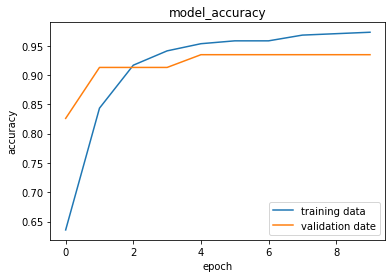

In [23]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('model_accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')

plt.legend(['training data', 'validation date'], loc ='lower right')

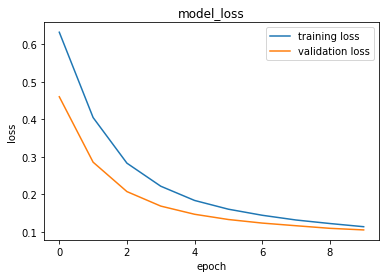

In [24]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model_loss')
plt.ylabel('loss')
plt.xlabel('epoch')

plt.legend(['training loss', 'validation loss'], loc ='upper right')

In [25]:
# Accuracy of the model on the test data

loss, accuracy = model.evaluate(x_test_std, y_test)
print(accuracy)

4/4 [==============================] - 0s 5ms/step - loss: 0.1134 - accuracy: 0.9649
0.9649122953414917


In [26]:
y_pred = model.predict(x_test_std)

4/4 [==============================] - 0s 5ms/step


'model.predict' finds 2 values for every data point, these 2 values represents the probabilities of being the 2 outputs (0 or 1)

In [27]:
print(y_pred)

[[0.6830295  0.81222105]
 [0.4772736  0.7133616 ]
 [0.12911911 0.9814705 ]
 [0.9999989  0.304477  ]
 [0.45064706 0.68808055]
 [0.99982333 0.2991066 ]
 [0.325701   0.8177617 ]
 [0.12696816 0.9810002 ]
 [0.16588436 0.9302339 ]
 [0.3241774  0.95235944]
 [0.4902338  0.6977106 ]
 [0.27842933 0.9216342 ]
 [0.4806966  0.8479825 ]
 [0.30040377 0.806716  ]
 [0.11750458 0.913678  ]
 [0.99280405 0.4361041 ]
 [0.19564123 0.9742843 ]
 [0.32200217 0.98380125]
 [0.14408462 0.9229584 ]
 [0.9982152  0.33500728]
 [0.49363217 0.9505606 ]
 [0.12651575 0.9793694 ]
 [0.22555147 0.95811516]
 [0.18641764 0.98342174]
 [0.38917452 0.8929214 ]
 [0.99228334 0.46498176]
 [0.3189804  0.9102973 ]
 [0.5845481  0.8647581 ]
 [0.97993493 0.52187896]
 [0.9936575  0.5678112 ]
 [0.45800897 0.94908684]
 [0.18221606 0.8959175 ]
 [0.2142722  0.9687726 ]
 [0.9999979  0.30964774]
 [0.99493355 0.5209619 ]
 [0.32826507 0.92378885]
 [0.14043258 0.9861641 ]
 [0.28560272 0.86386627]
 [0.15101972 0.9823177 ]
 [0.19681893 0.9505577 ]


In [28]:
test_pred = []
for i in range(len(y_pred)):
    if y_pred[i][0]>y_pred[i][1]:
        test_pred.append(0)
    else:
        test_pred.append(1)

In [29]:
print(test_pred)

[1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0]


In [30]:
y_pred_labels = [np.argmax(i) for i in y_pred]

In [31]:
print(y_pred_labels)

[1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0]


# Building the predictive system

In [32]:
input_data = (2.057e+01, 1.777e+01, 1.329e+02, 1.326e+03, 8.474e-02, 7.864e-02,
       8.690e-02, 7.017e-02, 1.812e-01, 5.667e-02, 5.435e-01, 7.339e-01,
       3.398e+00, 7.408e+01, 5.225e-03, 1.308e-02, 1.860e-02, 1.340e-02,
       1.389e-02, 3.532e-03, 2.499e+01, 2.341e+01, 1.588e+02, 1.956e+03,
       1.238e-01, 1.866e-01, 2.416e-01, 1.860e-01, 2.750e-01, 8.902e-02)

input_data_as_numpy_array = np.asarray(input_data)

input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

input_data_std = scaler.fit_transform(input_data_reshaped)
                                      
prediction = model.predict(input_data_std)
print(prediction)

prediction_ = np.argmax(prediction) 
print(prediction_)

if prediction_==0:
    print("The tumor is Malignant")
else:
    print('The tumor is Benign')

1/1 [==============================] - 0s 39ms/step
[[0.4937878 0.5629563]]
1
The tumor is Benign
